In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
config = {
    "base_dir":        "/eos/home-b/bpinolin/ML_output/",
    "plot_config":     "VBSOS",
    "cut":             "sr",
    "model_version":   "v0",
    "samples_version": "v0"
}

In [3]:
import os

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])
# create the model directory
model_dir   = os.path.join(config_base_dir, config["cut"] , "models",  config["model_version"])
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
file_sig_bal = os.path.join(samples_dir, "for_training/signal_balanced.pkl")
file_bkg_bal = os.path.join(samples_dir, "for_training/background_balanced.pkl")

In [4]:
import pickle
signal = pickle.load(open(file_sig_bal, "rb"))
bkg = pickle.load(open(file_bkg_bal, "rb"))

In [5]:
lumi = 59.74
round((bkg.weight_).sum()*lumi,2)

131234.22

In [6]:
bkg.columns

Index(['detajj', 'eta1', 'eta2', 'detall', 'jetpt1', 'jetpt2', 'met', 'dphill',
       'dphijj', 'Mll', 'btag_first', 'dR_jl1', 'dR_jl2', 'Zeppll', 'weight_',
       'sample_name', 'class', 'signal', 'weight_norm'],
      dtype='object')

In [8]:
var = bkg.columns[9]
print(var)
Nbin = 20
Rrange = (0,350)

Mll


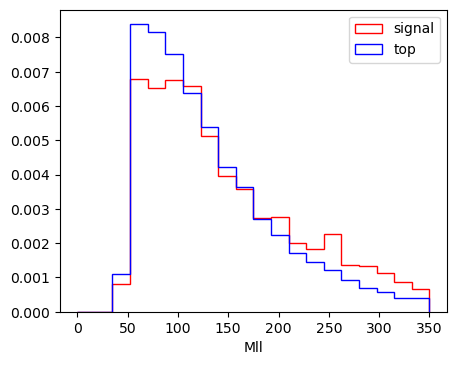

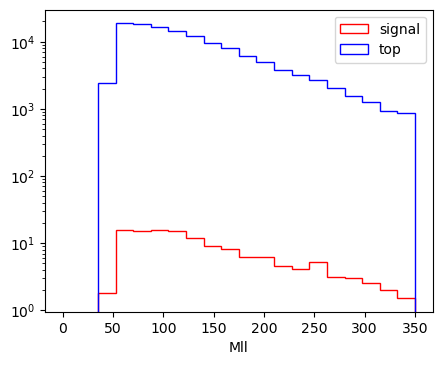

NS =  142.0
NB =  131234.2


In [10]:
fig, ax1 = plt.subplots(figsize=(5,4), dpi=100)

plt.hist(signal[var], density = True, weights=signal.weight_*lumi, histtype="step", bins=Nbin, color="red", label="signal", range=Rrange)
plt.hist(bkg[var], density = True, weights=bkg.weight_*lumi, histtype="step", bins=Nbin, color="blue", label="top", range=Rrange)

plt.legend()
plt.xlabel(var)
plt.show()

fig, ax1 = plt.subplots(figsize=(5,4), dpi=100)
plt.hist(signal[var], weights=signal.weight_*lumi, histtype="step", bins=Nbin, color="red", label="signal", range=Rrange)
plt.hist(bkg[var], weights=bkg.weight_*lumi, histtype="step", bins=Nbin, color="blue", label="top", range=Rrange)
                                             
plt.legend()
plt.xlabel(var)
plt.yscale("log")
plt.show()
                        
print("NS = ", round((signal.weight_).sum()*lumi,1))
print("NB = ", round((bkg.weight_).sum()*lumi,1))